In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)

In [8]:
st_math = pd.read_csv('student-mat.csv', header = 0)
st_port = pd.read_csv('student-por.csv', header = 0)

In [9]:
frames = [st_math, st_port]

# Criar a coluna boolean type
* 0 = matemática
* 1 = português

In [10]:
st_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [11]:
st_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


# Criar coluna is_approved

Conforme falamos, vamos criar uma nova coluna de aprovação x reprovação.
Eu considerei a média da escola para definir se o aluno estaria aprovado ou reprovado.

In [12]:
for dataset in frames:
    ave = sum(dataset.G3)/float(len(dataset))
    dataset['is_approved'] = [1 if i > ave else 0 for i in dataset.G3]

In [13]:
st_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,is_approved
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0


In [14]:
st_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,is_approved
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,1


# Criar um novo dataframe dataset que compila as duas bases

In [15]:
frames = [st_math, st_port]
dataset = pd.concat(frames, sort=False)
print("Length result dataset: {} rows".format(len(dataset)))

Length result dataset: 1044 rows


# Remover as colunas G1 e G2 e criar coluna is_approved
Conforme, falamos não vamos utilizar G1, G2 e G3 no modelo, mas vamos criar uma nova coluna de aprovação x reprovação.

In [16]:
deleted_columns = ['G1', 'G2', 'G3']
for c in deleted_columns:
    del dataset[c]

In [17]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,is_approved
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,0


In [18]:
dataset.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'is_approved'],
      dtype='object')

# Aplicar one-hot enconding nas colunas
'Medu','Fedu','Mjob','Fjob','reason','guardian'

In [19]:
# converter para binário
one_hot_columns = ['Medu','Fedu','Mjob','Fjob','reason','guardian']

In [20]:
dataset = dataset.copy()
dataset = pd.get_dummies(dataset, columns=['Medu','Fedu','Mjob','Fjob','reason','guardian'], prefix = ['Medu','Fedu','Mjob','Fjob','reason','guardian'])

In [21]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,is_approved,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,GP,F,18,U,GT3,A,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


# Converter de nominal para binário

In [22]:
print("school: " , dataset.school.unique())
print("sex: " , dataset.sex.unique())
print("address: " , dataset.address.unique())
print("famsize: " , dataset.famsize.unique())
print("schoolsup: " , dataset.schoolsup.unique())
print("famsup: " , dataset.famsup.unique())
print("paid: " , dataset.paid.unique())
print("activities: " , dataset.activities.unique())
print("nursery: " , dataset.nursery.unique())
print("higher: " , dataset.higher.unique())
print("internet: " , dataset.internet.unique())
print("romantic: " , dataset.romantic.unique())
print("Pstatus: " , dataset.Pstatus.unique())

school:  ['GP' 'MS']
sex:  ['F' 'M']
address:  ['U' 'R']
famsize:  ['GT3' 'LE3']
schoolsup:  ['yes' 'no']
famsup:  ['no' 'yes']
paid:  ['no' 'yes']
activities:  ['no' 'yes']
nursery:  ['yes' 'no']
higher:  ['yes' 'no']
internet:  ['no' 'yes']
romantic:  ['no' 'yes']
Pstatus:  ['A' 'T']


In [23]:
dataset['school'] = dataset['school'].map( {'GP': 0, 'MS': 1} ).astype(int)
dataset['sex'] = dataset['sex'].map( {'F': 0, 'M': 1} ).astype(int)
dataset['address'] = dataset['address'].map( {'U': 0, 'R': 1} ).astype(int)
dataset['famsize'] = dataset['famsize'].map( {'GT3': 0, 'LE3': 1}).astype(int)
dataset['Pstatus'] = dataset['Pstatus'].map( {'A': 0, 'T': 1}).astype(int)

In [24]:
binary_columns = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic']

for c in binary_columns:
    dataset[c] = dataset[c].map( {'yes': 1, 'no': 0} ).astype(int)

In [25]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,is_approved,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,0,0,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0,0,17,0,0,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,15,0,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,0,15,0,0,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,16,0,0,1,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


# Aplicar min-max nas colunas

In [26]:
dataset.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'is_approved', 'Medu_0',
       'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_0', 'Fedu_1', 'Fedu_2',
       'Fedu_3', 'Fedu_4', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [27]:
from sklearn import preprocessing

x = dataset.values  #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))

dataset_normal = pd.DataFrame(x_scaled, columns=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'traveltime',
                                   'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
                                   'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
                                   'goout', 'Dalc', 'Walc', 'health', 'absences', 'is_approved', 'Medu_0',
                                   'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_0', 'Fedu_1', 'Fedu_2',
                                   'Fedu_3', 'Fedu_4', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
                                   'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
                                   'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
                                   'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
                                   'guardian_mother', 'guardian_other'])

# Temos um novo dataset normalizado: dataset_normal


In [28]:
dataset_normal.head()

,school,sex,age,address,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,is_approved,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0.0,0.0,0.428571,0.0,0.0,0.0,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.5,0.080000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.285714,0.0,0.0,1.0,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.5,0.053333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,1.0,1.0,0.000000,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.5,0.133333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.666667,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.0,0.026667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.142857,0.0,0.0,1.0,0.000000,0.333333,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.0,0.053333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [29]:
# Separa o dataset_normal em dataset_features e dataset_target

features = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'traveltime', 'studytime', 'failures', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 
            'Dalc', 'Walc', 'health', 'absences', 'Medu_0', 'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_0', 'Fedu_1', 
            'Fedu_2', 'Fedu_3', 'Fedu_4', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 
            'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 
            'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other']

# Separating out the features
dataset_features = pd.DataFrame(dataset_normal.loc[:, features].values, columns=[features])

# Separating out the target
dataset_target = pd.DataFrame(dataset_normal.loc[:, ['is_approved']].values, columns=['is_approved'])

In [30]:
# Dataset apenas com as características

print("Number of features: {}" .format(len(dataset_features.columns)))
print("Number of target: {}" .format(len(dataset_target.columns)))

Number of features: 51
Number of target: 1


# Aplicação do PCA

A biblioteca utilizada para calcular o PCA foi [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

### Uso de matriz de covariância
De acordo com a documentação e código no github da biblioteca, o PCA foi calculado utilizando **matriz de covariância**. 

https://github.com/scikit-learn/scikit-learn/blob/95d4f0841/sklearn/decomposition/_pca.py#L104

In [31]:
pca = PCA()
dataset_reduced = pca.fit_transform(dataset_features)

principal_components = pd.DataFrame(data=dataset_reduced)
principal_components.add_prefix('PC_').head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
0,0.439324,0.654470,-1.016350,-0.021965,-0.523504,-0.533544,0.059474,0.760187,0.003886,0.321654,-0.820707,-0.262440,-0.278641,-1.018929,0.449595,-0.249397,0.705631,0.327738,0.298520,0.411859,0.254155,0.067120,0.724449,0.522755,0.187075,0.052799,0.268139,0.182865,0.497462,-0.037366,-0.317575,-0.088056,0.202790,0.278766,0.620366,-0.272528,-0.225919,-0.047627,0.020705,0.071909,0.117235,-0.258994,-0.021241,0.006400,0.012934,1.087899e-14,-8.187247e-16,9.150244e-17,-7.614565e-17,2.622975e-16,4.642706e-17
1,-0.883040,0.580097,0.160489,-0.732318,-0.703099,-0.423045,0.759108,0.240373,0.365586,-0.924110,-0.336765,-0.769021,0.047639,-0.248397,-0.036842,0.872517,-0.197601,-0.325982,0.217110,-0.117158,-0.126309,-0.019692,-0.371533,0.084942,-0.213269,-0.064717,0.041093,-0.179671,0.059439,0.212664,-0.361410,-0.203681,0.040670,0.137802,-0.061201,0.145853,-0.200638,0.043804,0.007214,0.037497,0.146797,-0.056603,-0.034054,0.019757,0.034189,2.272990e-15,-1.787743e-15,9.131081e-16,3.902320e-16,-1.050173e-15,6.562848e-16
2,-0.693664,0.027475,-0.610833,-0.194382,-0.244249,0.932164,-0.174160,0.519010,0.424301,-0.789038,-0.872118,-0.491860,0.183295,-0.090689,-0.363263,0.364970,-0.348478,1.030633,0.037129,0.301497,0.160241,-0.380805,-0.354980,0.939561,0.437218,0.484617,-0.094554,-0.042977,0.110575,-0.347615,0.226423,-0.045182,-0.044785,0.022907,-0.169629,-0.151109,-0.136541,-0.045926,0.810161,-0.062697,-0.174756,0.337184,-0.063106,0.035681,0.073539,-9.859803e-16,-2.056791e-15,7.320000e-16,4.294039e-16,5.931294e-16,2.685045e-16
3,1.097822,-0.066469,0.094620,0.635407,-0.643340,0.182667,-0.762941,0.420061,-0.753915,-0.161038,0.736095,-0.142125,0.515379,0.226210,0.457286,0.333294,-0.267356,0.520516,-0.406655,-0.517787,-0.057476,-0.363695,-0.350680,-0.522399,-0.253699,0.166158,0.480060,0.580457,0.115642,-0.003487,0.255672,0.028073,0.174111,-0.018331,0.204451,-0.270119,0.043515,-0.074882,-0.131851,-0.017500,0.015087,0.158278,0.010597,0.005377,-0.019681,6.043688e-16,-3.777384e-16,3.318693e-16,8.245244e-16,6.411266e-16,-3.515303e-16
4,-0.087684,-0.949674,1.191923,-0.790623,-0.503043,-0.072283,0.827485,0.745704,0.178464,0.193591,0.135824,-0.442936,0.423268,0.054066,0.110072,-0.670037,0.166247,0.753062,-0.064403,-0.124982,0.437787,-0.124621,-0.023135,-0.505976,-0.210263,-0.057522,-0.278145,-0.144479,-0.222785,0.110322,0.045390,-0.325305,-0.023318,0.016512,-0.087215,-0.106883,0.011161,-0.091907,-0.022074,-0.015256,-0.050067,0.012969,-0.010518,0.045997,-0.017347,3.300969e-16,3.683958e-17,-9.826641e-17,2.672237e-16,8.675613e-16,1.034183e-17


In [32]:
dataset_target.head()

,is_approved
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [33]:
dataset_pca = principal_components
dataset_pca['is_approved'] =  dataset_target['is_approved']
dataset_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,is_approved
0,0.439324,0.654470,-1.016350,-0.021965,-0.523504,-0.533544,0.059474,0.760187,0.003886,0.321654,-0.820707,-0.262440,-0.278641,-1.018929,0.449595,-0.249397,0.705631,0.327738,0.298520,0.411859,0.254155,0.067120,0.724449,0.522755,0.187075,0.052799,0.268139,0.182865,0.497462,-0.037366,-0.317575,-0.088056,0.202790,0.278766,0.620366,-0.272528,-0.225919,-0.047627,0.020705,0.071909,0.117235,-0.258994,-0.021241,0.006400,0.012934,1.087899e-14,-8.187247e-16,9.150244e-17,-7.614565e-17,2.622975e-16,4.642706e-17,0.0
1,-0.883040,0.580097,0.160489,-0.732318,-0.703099,-0.423045,0.759108,0.240373,0.365586,-0.924110,-0.336765,-0.769021,0.047639,-0.248397,-0.036842,0.872517,-0.197601,-0.325982,0.217110,-0.117158,-0.126309,-0.019692,-0.371533,0.084942,-0.213269,-0.064717,0.041093,-0.179671,0.059439,0.212664,-0.361410,-0.203681,0.040670,0.137802,-0.061201,0.145853,-0.200638,0.043804,0.007214,0.037497,0.146797,-0.056603,-0.034054,0.019757,0.034189,2.272990e-15,-1.787743e-15,9.131081e-16,3.902320e-16,-1.050173e-15,6.562848e-16,0.0
2,-0.693664,0.027475,-0.610833,-0.194382,-0.244249,0.932164,-0.174160,0.519010,0.424301,-0.789038,-0.872118,-0.491860,0.183295,-0.090689,-0.363263,0.364970,-0.348478,1.030633,0.037129,0.301497,0.160241,-0.380805,-0.354980,0.939561,0.437218,0.484617,-0.094554,-0.042977,0.110575,-0.347615,0.226423,-0.045182,-0.044785,0.022907,-0.169629,-0.151109,-0.136541,-0.045926,0.810161,-0.062697,-0.174756,0.337184,-0.063106,0.035681,0.073539,-9.859803e-16,-2.056791e-15,7.320000e-16,4.294039e-16,5.931294e-16,2.685045e-16,0.0
3,1.097822,-0.066469,0.094620,0.635407,-0.643340,0.182667,-0.762941,0.420061,-0.753915,-0.161038,0.736095,-0.142125,0.515379,0.226210,0.457286,0.333294,-0.267356,0.520516,-0.406655,-0.517787,-0.057476,-0.363695,-0.350680,-0.522399,-0.253699,0.166158,0.480060,0.580457,0.115642,-0.003487,0.255672,0.028073,0.174111,-0.018331,0.204451,-0.270119,0.043515,-0.074882,-0.131851,-0.017500,0.015087,0.158278,0.010597,0.005377,-0.019681,6.043688e-16,-3.777384e-16,3.318693e-16,8.245244e-16,6.411266e-16,-3.515303e-16,1.0
4,-0.087684,-0.949674,1.191923,-0.790623,-0.503043,-0.072283,0.827485,0.745704,0.178464,0.193591,0.135824,-0.442936,0.423268,0.054066,0.110072,-0.670037,0.166247,0.753062,-0.064403,-0.124982,0.437787,-0.124621,-0.023135,-0.505976,-0.210263,-0.057522,-0.278145,-0.144479,-0.222785,0.110322,0.045390,-0.325305,-0.023318,0.016512,-0.087215,-0.106883,0.011161,-0.091907,-0.022074,-0.015256,-0.050067,0.012969,-0.010518,0.045997,-0.017347,3.300969e-16,3.683958e-17,-9.826641e-17,2.672237e-16,8.675613e-16,1.034183e-17,0.0


In [35]:
dataset_pca.shape

(1044, 52)

In [36]:
dataset_pca.to_csv("dataset-pca.csv", index=False)

In [43]:
new_40_pca = PCA(n_components=40)
dataset_40 = new_40_pca.fit_transform(dataset_features)

In [44]:
pc_40 = pd.DataFrame(data=dataset_40)
pc_40.add_prefix('PC_').head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39
0,0.439324,0.654470,-1.016350,-0.021965,-0.523504,-0.533544,0.059474,0.760187,0.003886,0.321654,-0.820707,-0.262440,-0.278641,-1.018929,0.449595,-0.249397,0.705631,0.327738,0.298520,0.411859,0.254155,0.067120,0.724449,0.522755,0.187075,0.052799,0.268139,0.182865,0.497462,-0.037366,-0.317575,-0.088056,0.202790,0.278766,0.620366,-0.272528,-0.225919,-0.047627,0.020705,0.071909
1,-0.883040,0.580097,0.160489,-0.732318,-0.703099,-0.423045,0.759108,0.240373,0.365586,-0.924110,-0.336765,-0.769021,0.047639,-0.248397,-0.036842,0.872517,-0.197601,-0.325982,0.217110,-0.117158,-0.126309,-0.019692,-0.371533,0.084942,-0.213269,-0.064717,0.041093,-0.179671,0.059439,0.212664,-0.361410,-0.203681,0.040670,0.137802,-0.061201,0.145853,-0.200638,0.043804,0.007214,0.037497
2,-0.693664,0.027475,-0.610833,-0.194382,-0.244249,0.932164,-0.174160,0.519010,0.424301,-0.789038,-0.872118,-0.491860,0.183295,-0.090689,-0.363263,0.364970,-0.348478,1.030633,0.037129,0.301497,0.160241,-0.380805,-0.354980,0.939561,0.437218,0.484617,-0.094554,-0.042977,0.110575,-0.347615,0.226423,-0.045182,-0.044785,0.022907,-0.169629,-0.151109,-0.136541,-0.045926,0.810161,-0.062697
3,1.097822,-0.066469,0.094620,0.635407,-0.643340,0.182667,-0.762941,0.420061,-0.753915,-0.161038,0.736095,-0.142125,0.515379,0.226210,0.457286,0.333294,-0.267356,0.520516,-0.406655,-0.517787,-0.057476,-0.363695,-0.350680,-0.522399,-0.253699,0.166158,0.480060,0.580457,0.115642,-0.003487,0.255672,0.028073,0.174111,-0.018331,0.204451,-0.270119,0.043515,-0.074882,-0.131851,-0.017500
4,-0.087684,-0.949674,1.191923,-0.790623,-0.503043,-0.072283,0.827485,0.745704,0.178464,0.193591,0.135824,-0.442936,0.423268,0.054066,0.110072,-0.670037,0.166247,0.753062,-0.064403,-0.124982,0.437787,-0.124621,-0.023135,-0.505976,-0.210263,-0.057522,-0.278145,-0.144479,-0.222785,0.110322,0.045390,-0.325305,-0.023318,0.016512,-0.087215,-0.106883,0.011161,-0.091907,-0.022074,-0.015256


In [47]:
pc_40['is_approved'] = dataset_target['is_approved']
pc_40.to_csv("dataset-pca-40.csv", index=False)

# Taxa de variância explicada

Para 100% de Taxa de Variância Explicada --> Número de CP: 51. 


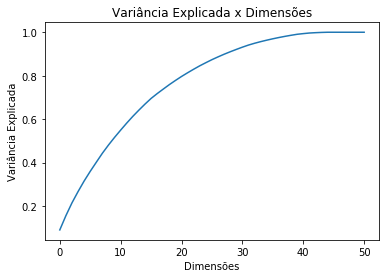

In [26]:
# Considerando todas as componentes principais
variance_explaneid = pca.explained_variance_ratio_
print("Para 100% de Taxa de Variância Explicada --> Número de CP: {}. " .format(len(principal_components.columns)))


# Gráfico de variação explicada com uma função do número de dimensões
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumsum)
plt.title('Variância Explicada x Dimensões')
plt.ylabel('Variância Explicada')
plt.xlabel('Dimensões')
plt.show()

# PCA para 70% de taxa de variância acumulada

In [27]:
pca = PCA(n_components = 0.70)
dataset_reduced = pca.fit_transform(dataset_features)

principal_components = pd.DataFrame(data=dataset_reduced)
principal_components.add_prefix('PC_').head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16
0,0.439324,0.654470,-1.016350,-0.021965,-0.523504,-0.533544,0.059474,0.760187,0.003886,0.321654,-0.820707,-0.262440,-0.278641,-1.018929,0.449595,-0.249397,0.705631
1,-0.883040,0.580097,0.160489,-0.732318,-0.703099,-0.423045,0.759108,0.240373,0.365586,-0.924110,-0.336765,-0.769021,0.047639,-0.248397,-0.036842,0.872517,-0.197601
2,-0.693664,0.027475,-0.610833,-0.194382,-0.244249,0.932164,-0.174160,0.519010,0.424301,-0.789038,-0.872118,-0.491860,0.183295,-0.090689,-0.363263,0.364970,-0.348478
3,1.097822,-0.066469,0.094620,0.635407,-0.643340,0.182667,-0.762941,0.420061,-0.753915,-0.161038,0.736095,-0.142125,0.515379,0.226210,0.457286,0.333294,-0.267356
4,-0.087684,-0.949674,1.191923,-0.790623,-0.503043,-0.072283,0.827485,0.745704,0.178464,0.193591,0.135824,-0.442936,0.423268,0.054066,0.110072,-0.670037,0.166247


[0.09052471 0.06533082 0.05912241 0.05187018 0.04874278 0.04445058
 0.04191305 0.04150201 0.03767495 0.03525721 0.03340338 0.0324099
 0.03086935 0.02878332 0.02764078 0.02599163 0.02221995]
Para 70% de Taxa de Variância Explicada --> Número de CP: 17. 


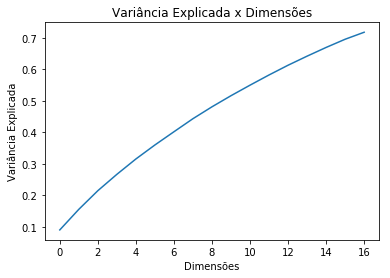

In [28]:
# Considerando todas as componentes principais
variance_explaneid = pca.explained_variance_ratio_
print(variance_explaneid)
print("Para 70% de Taxa de Variância Explicada --> Número de CP: {}. " .format(len(principal_components.columns)))


# Gráfico de variação explicada com uma função do número de dimensões
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumsum)
plt.title('Variância Explicada x Dimensões')
plt.ylabel('Variância Explicada')
plt.xlabel('Dimensões')
plt.show()

# PCA para 75% de taxa de variância acumulada

In [29]:
pca = PCA(n_components = 0.75)
dataset_reduced = pca.fit_transform(dataset_features)

principal_components = pd.DataFrame(data=dataset_reduced)
principal_components.add_prefix('PC_').head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18
0,0.439324,0.654470,-1.016350,-0.021965,-0.523504,-0.533544,0.059474,0.760187,0.003886,0.321654,-0.820707,-0.262440,-0.278641,-1.018929,0.449595,-0.249397,0.705631,0.327738,0.298520
1,-0.883040,0.580097,0.160489,-0.732318,-0.703099,-0.423045,0.759108,0.240373,0.365586,-0.924110,-0.336765,-0.769021,0.047639,-0.248397,-0.036842,0.872517,-0.197601,-0.325982,0.217110
2,-0.693664,0.027475,-0.610833,-0.194382,-0.244249,0.932164,-0.174160,0.519010,0.424301,-0.789038,-0.872118,-0.491860,0.183295,-0.090689,-0.363263,0.364970,-0.348478,1.030633,0.037129
3,1.097822,-0.066469,0.094620,0.635407,-0.643340,0.182667,-0.762941,0.420061,-0.753915,-0.161038,0.736095,-0.142125,0.515379,0.226210,0.457286,0.333294,-0.267356,0.520516,-0.406655
4,-0.087684,-0.949674,1.191923,-0.790623,-0.503043,-0.072283,0.827485,0.745704,0.178464,0.193591,0.135824,-0.442936,0.423268,0.054066,0.110072,-0.670037,0.166247,0.753062,-0.064403


[0.09052471 0.06533082 0.05912241 0.05187018 0.04874278 0.04445058
 0.04191305 0.04150201 0.03767495 0.03525721 0.03340338 0.0324099
 0.03086935 0.02878332 0.02764078 0.02599163 0.02221995 0.02083404
 0.02054   ]
Para 75% de Taxa de Variância Explicada --> Número de CP: 19. 


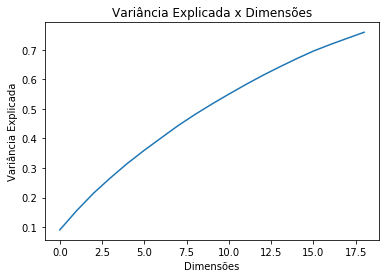

In [30]:
# Considerando todas as componentes principais
variance_explaneid = pca.explained_variance_ratio_
print(variance_explaneid)
print("Para 75% de Taxa de Variância Explicada --> Número de CP: {}. " .format(len(principal_components.columns)))


# Gráfico de variação explicada com uma função do número de dimensões
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumsum)
plt.title('Variância Explicada x Dimensões')
plt.ylabel('Variância Explicada')
plt.xlabel('Dimensões')
plt.show()

# PCA para 80% de taxa de variância acumulada

In [31]:
pca = PCA(n_components = 0.8)
dataset_reduced = pca.fit_transform(dataset_features)

principal_components = pd.DataFrame(data=dataset_reduced)
principal_components.add_prefix('PC_').head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21
0,0.439324,0.654470,-1.016350,-0.021965,-0.523504,-0.533544,0.059474,0.760187,0.003886,0.321654,-0.820707,-0.262440,-0.278641,-1.018929,0.449595,-0.249397,0.705631,0.327738,0.298520,0.411859,0.254155,0.067120
1,-0.883040,0.580097,0.160489,-0.732318,-0.703099,-0.423045,0.759108,0.240373,0.365586,-0.924110,-0.336765,-0.769021,0.047639,-0.248397,-0.036842,0.872517,-0.197601,-0.325982,0.217110,-0.117158,-0.126309,-0.019692
2,-0.693664,0.027475,-0.610833,-0.194382,-0.244249,0.932164,-0.174160,0.519010,0.424301,-0.789038,-0.872118,-0.491860,0.183295,-0.090689,-0.363263,0.364970,-0.348478,1.030633,0.037129,0.301497,0.160241,-0.380805
3,1.097822,-0.066469,0.094620,0.635407,-0.643340,0.182667,-0.762941,0.420061,-0.753915,-0.161038,0.736095,-0.142125,0.515379,0.226210,0.457286,0.333294,-0.267356,0.520516,-0.406655,-0.517787,-0.057476,-0.363695
4,-0.087684,-0.949674,1.191923,-0.790623,-0.503043,-0.072283,0.827485,0.745704,0.178464,0.193591,0.135824,-0.442936,0.423268,0.054066,0.110072,-0.670037,0.166247,0.753062,-0.064403,-0.124982,0.437787,-0.124621


[0.09052471 0.06533082 0.05912241 0.05187018 0.04874278 0.04445058
 0.04191305 0.04150201 0.03767495 0.03525721 0.03340338 0.0324099
 0.03086935 0.02878332 0.02764078 0.02599163 0.02221995 0.02083404
 0.02054    0.01912599 0.01831711 0.01708404]
Para 80% de Taxa de Variância Explicada --> Número de CP: 22. 


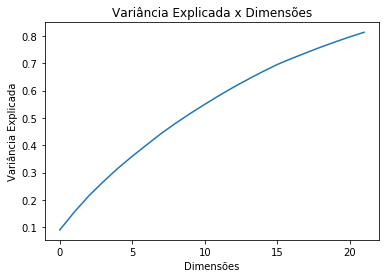

In [32]:
# Considerando todas as componentes principais
variance_explaneid = pca.explained_variance_ratio_
print(variance_explaneid)
print("Para 80% de Taxa de Variância Explicada --> Número de CP: {}. " .format(len(principal_components.columns)))


# Gráfico de variação explicada com uma função do número de dimensões
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumsum)
plt.title('Variância Explicada x Dimensões')
plt.ylabel('Variância Explicada')
plt.xlabel('Dimensões')
plt.show()

# PCA para 90% de taxa de variância acumulada

In [33]:
pca = PCA(n_components = 0.90)
dataset_reduced = pca.fit_transform(dataset_features)

principal_components = pd.DataFrame(data=dataset_reduced)
principal_components.add_prefix('PC_').head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28
0,0.439324,0.654470,-1.016350,-0.021965,-0.523504,-0.533544,0.059474,0.760187,0.003886,0.321654,-0.820707,-0.262440,-0.278641,-1.018929,0.449595,-0.249397,0.705631,0.327738,0.298520,0.411859,0.254155,0.067120,0.724449,0.522755,0.187075,0.052799,0.268139,0.182865,0.497462
1,-0.883040,0.580097,0.160489,-0.732318,-0.703099,-0.423045,0.759108,0.240373,0.365586,-0.924110,-0.336765,-0.769021,0.047639,-0.248397,-0.036842,0.872517,-0.197601,-0.325982,0.217110,-0.117158,-0.126309,-0.019692,-0.371533,0.084942,-0.213269,-0.064717,0.041093,-0.179671,0.059439
2,-0.693664,0.027475,-0.610833,-0.194382,-0.244249,0.932164,-0.174160,0.519010,0.424301,-0.789038,-0.872118,-0.491860,0.183295,-0.090689,-0.363263,0.364970,-0.348478,1.030633,0.037129,0.301497,0.160241,-0.380805,-0.354980,0.939561,0.437218,0.484617,-0.094554,-0.042977,0.110575
3,1.097822,-0.066469,0.094620,0.635407,-0.643340,0.182667,-0.762941,0.420061,-0.753915,-0.161038,0.736095,-0.142125,0.515379,0.226210,0.457286,0.333294,-0.267356,0.520516,-0.406655,-0.517787,-0.057476,-0.363695,-0.350680,-0.522399,-0.253699,0.166158,0.480060,0.580457,0.115642
4,-0.087684,-0.949674,1.191923,-0.790623,-0.503043,-0.072283,0.827485,0.745704,0.178464,0.193591,0.135824,-0.442936,0.423268,0.054066,0.110072,-0.670037,0.166247,0.753062,-0.064403,-0.124982,0.437787,-0.124621,-0.023135,-0.505976,-0.210263,-0.057522,-0.278145,-0.144479,-0.222785


[0.09052471 0.06533082 0.05912241 0.05187018 0.04874278 0.04445058
 0.04191305 0.04150201 0.03767495 0.03525721 0.03340338 0.0324099
 0.03086935 0.02878332 0.02764078 0.02599163 0.02221995 0.02083404
 0.02054    0.01912599 0.01831711 0.01708404 0.01634897 0.01572323
 0.01433431 0.01391475 0.01277523 0.01218618 0.01132171]
Para 90% de Taxa de Variância Explicada --> Número de CP: 29. 


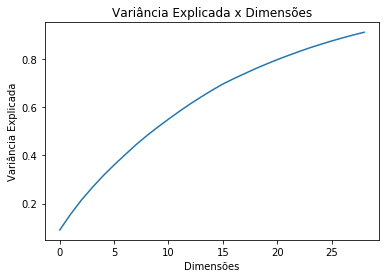

In [34]:
# Considerando todas as componentes principais
variance_explaneid = pca.explained_variance_ratio_
print(variance_explaneid)
print("Para 90% de Taxa de Variância Explicada --> Número de CP: {}. " .format(len(principal_components.columns)))


# Gráfico de variação explicada com uma função do número de dimensões
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumsum)
plt.title('Variância Explicada x Dimensões')
plt.ylabel('Variância Explicada')
plt.xlabel('Dimensões')
plt.show()